In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from typing import Literal
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit
from scipy.stats import lognorm, norm
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets


In [3]:
eap = pd.read_csv('./ensembled_annotations_public.csv')

In [4]:
eap

,instance_id,underspecified,underspecified_notes,false_negative,false_negative_notes,other_major_issues,other_notes,difficulty,underspecified_decided_by,false_negative_decided_by,other_major_issues_decided_by,difficulty_decided_by,difficulty_ensemble_decision_procedure,filter_out
0,astropy__astropy-11693,1.0,The issue arises when attempting to plot an im...,3.0,"The test patch, checks that NoConvergence erro...",0.0,NaN,15 min - 1 hour,17,72,17,"[17, 72, 69]",majority,True
1,astropy__astropy-12544,0.0,The problem described in the issue is that whe...,3.0,"The parameter introduced is `mask_invalid`, wh...",0.0,NaN,1-4 hours,65,65,65,"[65, 71]",majority,True
2,astropy__astropy-12825,1.0,The issue is clear and steps to replicate it a...,2.0,The tests cover all solutions for both the sup...,0.0,NaN,1-4 hours,91,91,55,[12],median,True
3,astropy__astropy-12842,1.0,"Though, there are some external links were pro...",2.0,The tests are working but some perfectly reaso...,0.0,NaN,1-4 hours,87,87,87,"[90, 31]",majority,True
4,astropy__astropy-12880,1.0,"After upgrading from Astropy 4.2.1 to 5.0+, `B...",3.0,The test assumes a solution that involves allo...,0.0,NaN,<15 min fix,17,78,17,"[17, 78]",majority,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,sympy__sympy-24539,0.0,The issue is crystal clear in the ticket. It s...,1.0,The tests specifically check whether the `as_e...,0.0,NaN,<15 min fix,7,43,7,"[7, 44, 43]",majority,False
1695,sympy__sympy-24562,0.0,The issue raises a bug where the output of `Ra...,0.0,"The tests check that the value of `Rational(p,...",0.0,NaN,<15 min fix,65,65,65,"[13, 7]",majority,False
1696,sympy__sympy-24661,0.0,The ticket is very clear. The issue is that th...,0.0,The tests are testing all the relational possi...,0.0,NaN,15 min - 1 hour,7,7,7,"[7, 10]",majority,False
1697,sympy__sympy-24723,1.0,Sympy is returning the wrong constant in the P...,0.0,The test confirms the result of the formula is...,0.0,NaN,<15 min fix,59,78,78,"[78, 59, 72]",majority,False


In [5]:
sw3ap = pd.read_csv('./samples_with_3_annotations_public.csv')

In [6]:
sw3ap

,instance_id,user_id,difficulty,difficulty_notes,underspecified,underspecified_notes,false_negative,false_negative_notes,other_major_issues,other_notes,annotator_confidence,claimed_at,updated_at,submitted_at,reviews,comments,task_batch_name,problematic,underspecified_problematic,false_negative_problematic
0,astropy__astropy-11693,17,15 min - 1 hour,The file name and the function name including ...,1.0,The issue arises when attempting to plot an im...,0.0,The test patch introduces `test_non_convergenc...,0.0,NaN,5,2024-08-03T02:51:09.341935Z,2024-08-04T22:30:17.743645Z,2024-08-04 06:46:59.914292+00:00,NaN,NaN,Analysis 18,False,False,False
1,astropy__astropy-11693,72,15 min - 1 hour,Implementing a solution to the problem require...,0.0,The issue describes a bug in which WCS.all_wor...,3.0,"The test patch, checks that NoConvergence erro...",0.0,NaN,4,2024-08-03T07:55:42.672815Z,2024-08-04T22:30:18.330497Z,2024-08-03 08:46:28.503585+00:00,NaN,NaN,Analysis 18,True,False,True
2,astropy__astropy-11693,69,15 min - 1 hour,- The issue is clear to understand from the pr...,1.0,"- The problem statement is clear, descriptive ...",2.0,"- The problem statement is clear, even though ...",0.0,NaN,5,2024-08-03T08:27:49.488403Z,2024-08-04T22:30:17.660263Z,2024-08-03 09:09:13.284475+00:00,NaN,NaN,Analysis 18,True,False,True
3,astropy__astropy-12544,71,1-4 hours,An agent might need considerable time in figur...,0.0,1. The issue description clearly points the pr...,3.0,1. The test `test_mask_nans_on_read` checks fo...,0.0,NaN,5,2024-07-26T15:50:15.575150Z,2024-07-30T15:30:14.193026Z,2024-07-26 20:23:09.123642+00:00,NaN,NaN,Analysis 18,True,False,True
4,astropy__astropy-12544,49,<15 min fix,The problem statement is clear and well explai...,0.0,The problem statement explains the issue relat...,0.0,The gold patch fixes the mentioned issue in th...,0.0,NaN,4,2024-07-27T12:40:48.842345Z,2024-08-03T21:00:13.743519Z,2024-08-01 09:44:14.962890+00:00,NaN,NaN,Analysis 18,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,sympy__sympy-24723,78,<15 min fix,The fix is a matter of changing a few characte...,0.0,The issue describes an error in a mathematical...,0.0,The test confirms the result of the formula is...,0.0,NaN,5,2024-08-01T16:31:32.143348Z,2024-08-03T20:30:10.977692Z,2024-08-01 16:59:52.880102+00:00,NaN,NaN,Analysis 18,False,False,False
5093,sympy__sympy-24723,72,<15 min fix,"Resolving the issue involves trivia changes, h...",0.0,The issue describes a mismatch in the probabil...,0.0,The test patch is directed focused on testing ...,0.0,NaN,5,2024-08-01T17:35:10.135170Z,2024-08-02T04:59:39.405591Z,2024-08-02 04:59:37.395105+00:00,NaN,NaN,Analysis 18,False,False,False
5094,sympy__sympy-24909,23,15 min - 1 hour,The solution is simple but can take time to de...,0.0,it is clear that multiplying milli prefix from...,0.0,The test patch specificaly tests for m * W whe...,0.0,NaN,5,2024-07-28T05:41:31.490819Z,2024-07-28T09:27:31.105050Z,2024-07-28 09:27:29.371962+00:00,NaN,NaN,Analysis 18,False,False,False
5095,sympy__sympy-24909,82,<15 min fix,The solution involves a minor update to the pr...,0.0,The issue description outlines a bug in SymPy'...,2.0,The test patch includes assertions to verify t...,0.0,NaN,4,2024-08-01T11:43:07.669906Z,2024-08-04T21:00:16.933896Z,2024-08-01 16:42:42.197078+00:00,NaN,NaN,Analysis 18,True,False,True


In [7]:
for id in [
"django__django-10097",
"django__django-12155",
"django__django-14855",
"django__django-7530",
"pydata__xarray-7393",
"pytest-dev__pytest-8399",
"sympy__sympy-15809",
]:
    print(id)
    print(eap['difficulty'][eap['instance_id'] == id])


django__django-10097
72    <15 min fix
Name: difficulty, dtype: object
django__django-12155
213    15 min - 1 hour
Name: difficulty, dtype: object
django__django-14855
499    <15 min fix
Name: difficulty, dtype: object
django__django-7530
718    15 min - 1 hour
Name: difficulty, dtype: object
pydata__xarray-7393
969    15 min - 1 hour
Name: difficulty, dtype: object
pytest-dev__pytest-8399
1078    15 min - 1 hour
Name: difficulty, dtype: object
sympy__sympy-15809
1520    <15 min fix
Name: difficulty, dtype: object


In [11]:
resolved_swellama13b = [
"django__django-10097",
"django__django-12155",
"django__django-14855",
"django__django-7530",
"pydata__xarray-7393",
"pytest-dev__pytest-8399",
"sympy__sympy-15809",
]

In [12]:
resolved_claude35_sweagent = [  "astropy__astropy-14309",
    "astropy__astropy-14508",
    "astropy__astropy-14995",
    "astropy__astropy-7166",
    "astropy__astropy-7336",
    "astropy__astropy-7671",
    "django__django-10880",
    "django__django-10914",
    "django__django-10973",
    "django__django-11066",
    "django__django-11095",
    "django__django-11099",
    "django__django-11119",
    "django__django-11133",
    "django__django-11141",
    "django__django-11163",
    "django__django-11179",
    "django__django-11211",
    "django__django-11276",
    "django__django-11551",
    "django__django-11749",
    "django__django-11880",
    "django__django-12039",
    "django__django-12050",
    "django__django-12143",
    "django__django-12155",
    "django__django-12193",
    "django__django-12276",
    "django__django-12419",
    "django__django-12741",
    "django__django-13028",
    "django__django-13089",
    "django__django-13109",
    "django__django-13410",
    "django__django-13516",
    "django__django-13569",
    "django__django-13590",
    "django__django-13658",
    "django__django-13670",
    "django__django-13741",
    "django__django-13786",
    "django__django-13807",
    "django__django-13810",
    "django__django-13820",
    "django__django-13821",
    "django__django-13837",
    "django__django-13933",
    "django__django-14053",
    "django__django-14089",
    "django__django-14238",
    "django__django-14349",
    "django__django-14373",
    "django__django-14493",
    "django__django-14608",
    "django__django-14672",
    "django__django-14752",
    "django__django-14765",
    "django__django-14855",
    "django__django-14915",
    "django__django-15103",
    "django__django-15104",
    "django__django-15277",
    "django__django-15278",
    "django__django-15315",
    "django__django-15368",
    "django__django-15380",
    "django__django-15382",
    "django__django-15467",
    "django__django-15561",
    "django__django-15569",
    "django__django-15572",
    "django__django-15731",
    "django__django-15741",
    "django__django-15851",
    "django__django-15863",
    "django__django-15987",
    "django__django-16136",
    "django__django-16145",
    "django__django-16255",
    "django__django-16333",
    "django__django-16429",
    "django__django-16485",
    "django__django-16493",
    "django__django-16527",
    "django__django-16569",
    "django__django-16612",
    "django__django-16661",
    "django__django-16662",
    "django__django-16801",
    "django__django-16819",
    "django__django-16899",
    "django__django-17029",
    "django__django-17087",
    "django__django-7530",
    "django__django-9296",
    "matplotlib__matplotlib-20826",
    "matplotlib__matplotlib-22719",
    "matplotlib__matplotlib-24149",
    "matplotlib__matplotlib-24627",
    "matplotlib__matplotlib-24970",
    "matplotlib__matplotlib-25122",
    "matplotlib__matplotlib-25287",
    "matplotlib__matplotlib-25332",
    "matplotlib__matplotlib-26113",
    "psf__requests-1724",
    "psf__requests-1766",
    "psf__requests-1921",
    "psf__requests-2317",
    "pydata__xarray-2905",
    "pydata__xarray-3305",
    "pydata__xarray-3677",
    "pydata__xarray-4075",
    "pydata__xarray-4356",
    "pydata__xarray-4629",
    "pydata__xarray-4687",
    "pydata__xarray-6461",
    "pydata__xarray-6744",
    "pylint-dev__pylint-6528",
    "pylint-dev__pylint-6903",
    "pytest-dev__pytest-5809",
    "pytest-dev__pytest-6202",
    "pytest-dev__pytest-7205",
    "pytest-dev__pytest-7236",
    "pytest-dev__pytest-7571",
    "pytest-dev__pytest-7982",
    "pytest-dev__pytest-8399",
    "scikit-learn__scikit-learn-10297",
    "scikit-learn__scikit-learn-10844",
    "scikit-learn__scikit-learn-11578",
    "scikit-learn__scikit-learn-12585",
    "scikit-learn__scikit-learn-12973",
    "scikit-learn__scikit-learn-13124",
    "scikit-learn__scikit-learn-13135",
    "scikit-learn__scikit-learn-13142",
    "scikit-learn__scikit-learn-13496",
    "scikit-learn__scikit-learn-13779",
    "scikit-learn__scikit-learn-14087",
    "scikit-learn__scikit-learn-14141",
    "scikit-learn__scikit-learn-14496",
    "scikit-learn__scikit-learn-14710",
    "scikit-learn__scikit-learn-14894",
    "scikit-learn__scikit-learn-25102",
    "scikit-learn__scikit-learn-25931",
    "scikit-learn__scikit-learn-9288",
    "sympy__sympy-11618",
    "sympy__sympy-12096",
    "sympy__sympy-13372",
    "sympy__sympy-13480",
    "sympy__sympy-13647",
    "sympy__sympy-14711",
    "sympy__sympy-14976",
    "sympy__sympy-16450",
    "sympy__sympy-16766",
    "sympy__sympy-16886",
    "sympy__sympy-18211",
    "sympy__sympy-18763",
    "sympy__sympy-19495",
    "sympy__sympy-19637",
    "sympy__sympy-20154",
    "sympy__sympy-20590",
    "sympy__sympy-21847",
    "sympy__sympy-22914",
    "sympy__sympy-23262",
    "sympy__sympy-23534",
    "sympy__sympy-23824",
    "sympy__sympy-24213",
    "sympy__sympy-24443",
    "sympy__sympy-24539"
    ]

In [13]:
resolved_gru = [
    "astropy__astropy-13236",
    "astropy__astropy-14309",
    "astropy__astropy-14539",
    "astropy__astropy-14995",
    "astropy__astropy-7166",
    "astropy__astropy-7336",
    "astropy__astropy-7671",
    "django__django-10097",
    "django__django-10880",
    "django__django-10914",
    "django__django-10973",
    "django__django-11066",
    "django__django-11095",
    "django__django-11099",
    "django__django-11119",
    "django__django-11133",
    "django__django-11163",
    "django__django-11179",
    "django__django-11265",
    "django__django-11276",
    "django__django-11292",
    "django__django-11555",
    "django__django-11603",
    "django__django-11749",
    "django__django-11790",
    "django__django-11815",
    "django__django-11880",
    "django__django-11999",
    "django__django-12050",
    "django__django-12143",
    "django__django-12155",
    "django__django-12193",
    "django__django-12209",
    "django__django-12276",
    "django__django-12308",
    "django__django-12325",
    "django__django-12419",
    "django__django-12708",
    "django__django-12713",
    "django__django-12741",
    "django__django-12774",
    "django__django-13012",
    "django__django-13028",
    "django__django-13089",
    "django__django-13109",
    "django__django-13315",
    "django__django-13346",
    "django__django-13363",
    "django__django-13401",
    "django__django-13410",
    "django__django-13417",
    "django__django-13516",
    "django__django-13569",
    "django__django-13658",
    "django__django-13670",
    "django__django-13741",
    "django__django-13786",
    "django__django-13809",
    "django__django-13820",
    "django__django-13821",
    "django__django-13837",
    "django__django-13933",
    "django__django-14053",
    "django__django-14089",
    "django__django-14122",
    "django__django-14238",
    "django__django-14373",
    "django__django-14434",
    "django__django-14493",
    "django__django-14500",
    "django__django-14559",
    "django__django-14672",
    "django__django-14752",
    "django__django-14765",
    "django__django-14771",
    "django__django-14855",
    "django__django-14915",
    "django__django-14999",
    "django__django-15022",
    "django__django-15103",
    "django__django-15104",
    "django__django-15277",
    "django__django-15278",
    "django__django-15315",
    "django__django-15368",
    "django__django-15380",
    "django__django-15467",
    "django__django-15499",
    "django__django-15561",
    "django__django-15569",
    "django__django-15572",
    "django__django-15731",
    "django__django-15741",
    "django__django-15814",
    "django__django-15851",
    "django__django-15987",
    "django__django-16100",
    "django__django-16136",
    "django__django-16139",
    "django__django-16145",
    "django__django-16255",
    "django__django-16333",
    "django__django-16429",
    "django__django-16485",
    "django__django-16493",
    "django__django-16527",
    "django__django-16595",
    "django__django-16612",
    "django__django-16642",
    "django__django-16662",
    "django__django-16801",
    "django__django-16819",
    "django__django-16899",
    "django__django-16901",
    "django__django-17029",
    "django__django-17087",
    "django__django-7530",
    "django__django-9296",
    "matplotlib__matplotlib-13989",
    "matplotlib__matplotlib-20859",
    "matplotlib__matplotlib-22719",
    "matplotlib__matplotlib-23314",
    "matplotlib__matplotlib-23412",
    "matplotlib__matplotlib-24026",
    "matplotlib__matplotlib-24570",
    "matplotlib__matplotlib-24970",
    "matplotlib__matplotlib-25122",
    "matplotlib__matplotlib-25287",
    "matplotlib__matplotlib-25332",
    "matplotlib__matplotlib-26113",
    "matplotlib__matplotlib-26342",
    "pallets__flask-5014",
    "psf__requests-1142",
    "psf__requests-1724",
    "psf__requests-1766",
    "psf__requests-2317",
    "psf__requests-2931",
    "pydata__xarray-3095",
    "pydata__xarray-3151",
    "pydata__xarray-3305",
    "pydata__xarray-3677",
    "pydata__xarray-4075",
    "pydata__xarray-4356",
    "pydata__xarray-4629",
    "pydata__xarray-4966",
    "pydata__xarray-6461",
    "pydata__xarray-6744",
    "pydata__xarray-7233",
    "pylint-dev__pylint-6903",
    "pylint-dev__pylint-7277",
    "pytest-dev__pytest-10081",
    "pytest-dev__pytest-5631",
    "pytest-dev__pytest-5809",
    "pytest-dev__pytest-6202",
    "pytest-dev__pytest-7205",
    "pytest-dev__pytest-7432",
    "pytest-dev__pytest-7571",
    "pytest-dev__pytest-7982",
    "pytest-dev__pytest-8399",
    "scikit-learn__scikit-learn-10297",
    "scikit-learn__scikit-learn-10844",
    "scikit-learn__scikit-learn-10908",
    "scikit-learn__scikit-learn-11310",
    "scikit-learn__scikit-learn-11578",
    "scikit-learn__scikit-learn-12585",
    "scikit-learn__scikit-learn-12973",
    "scikit-learn__scikit-learn-13135",
    "scikit-learn__scikit-learn-13142",
    "scikit-learn__scikit-learn-13328",
    "scikit-learn__scikit-learn-13439",
    "scikit-learn__scikit-learn-13779",
    "scikit-learn__scikit-learn-14053",
    "scikit-learn__scikit-learn-14141",
    "scikit-learn__scikit-learn-14496",
    "scikit-learn__scikit-learn-14710",
    "scikit-learn__scikit-learn-14894",
    "scikit-learn__scikit-learn-15100",
    "scikit-learn__scikit-learn-25232",
    "scikit-learn__scikit-learn-25931",
    "scikit-learn__scikit-learn-25973",
    "scikit-learn__scikit-learn-26323",
    "scikit-learn__scikit-learn-9288",
    "sphinx-doc__sphinx-10323",
    "sphinx-doc__sphinx-10449",
    "sphinx-doc__sphinx-10466",
    "sphinx-doc__sphinx-10673",
    "sphinx-doc__sphinx-7440",
    "sphinx-doc__sphinx-7889",
    "sphinx-doc__sphinx-8035",
    "sphinx-doc__sphinx-8120",
    "sphinx-doc__sphinx-8269",
    "sphinx-doc__sphinx-8475",
    "sphinx-doc__sphinx-8595",
    "sphinx-doc__sphinx-8721",
    "sphinx-doc__sphinx-9281",
    "sphinx-doc__sphinx-9320",
    "sphinx-doc__sphinx-9367",
    "sphinx-doc__sphinx-9591",
    "sphinx-doc__sphinx-9698",
    "sphinx-doc__sphinx-9711",
    "sympy__sympy-12096",
    "sympy__sympy-13372",
    "sympy__sympy-13480",
    "sympy__sympy-13647",
    "sympy__sympy-13757",
    "sympy__sympy-14711",
    "sympy__sympy-15349",
    "sympy__sympy-15875",
    "sympy__sympy-16450",
    "sympy__sympy-16766",
    "sympy__sympy-16886",
    "sympy__sympy-18763",
    "sympy__sympy-19346",
    "sympy__sympy-19637",
    "sympy__sympy-21379",
    "sympy__sympy-21847",
    "sympy__sympy-22456",
    "sympy__sympy-22714",
    "sympy__sympy-22914",
    "sympy__sympy-23262",
    "sympy__sympy-23824",
    "sympy__sympy-23950",
    "sympy__sympy-24066",
    "sympy__sympy-24213",
    "sympy__sympy-24443",
    "sympy__sympy-24539"
  ]

In [20]:
resolvables = set(resolved_swellama13b + resolved_claude35_sweagent + resolved_gru)

resolved_difficulties = eap[eap['instance_id'].isin(resolvables)]['difficulty']

resolved_difficulties_list = resolved_difficulties.tolist()

In [26]:
difficulty_to_min = {
    '<15 min fix': 7.5,
    '15 min - 1 hour': 37.5,
    '1-4 hours': 150,
    '>4 hours': 300
}

resolved_minutes_list = [difficulty_to_min[difficulty] for difficulty in resolved_difficulties_list]

(array([417., 906.,   0.,   0., 329.,   0.,   0.,   0.,   0.,  47.]),
 array([  7.5 ,  36.75,  66.  ,  95.25, 124.5 , 153.75, 183.  , 212.25,
        241.5 , 270.75, 300.  ]),
 <BarContainer object of 10 artists>)

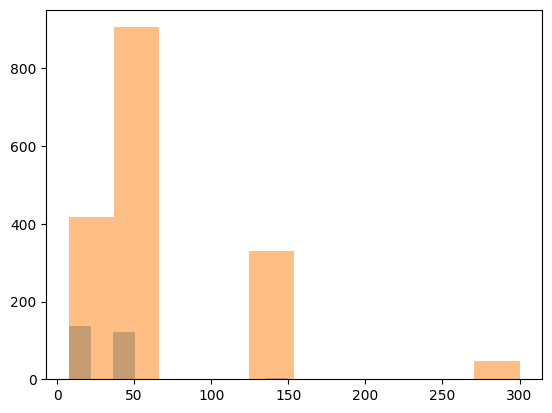

In [28]:
plt.hist(resolved_minutes_list, alpha=0.5)
plt.hist([difficulty_to_min[difficulty] for difficulty in eap['difficulty'].tolist()], alpha=0.5)

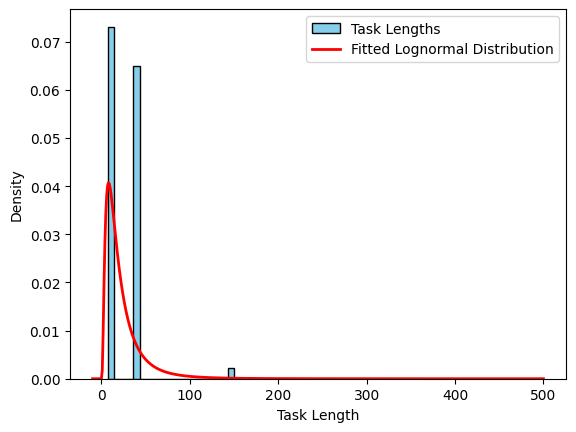

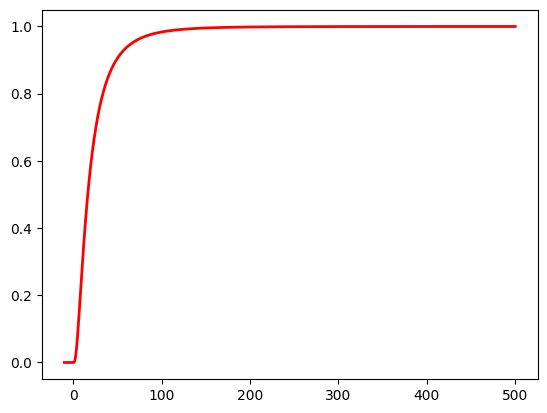

Fitted lognormal parameters: (0.8432431933963821, 0, 16.559376694756114)


In [30]:
# Plot histogram of task lengths
plt.hist(resolved_minutes_list, bins=20, density=True, color="skyblue", edgecolor="black", label="Task Lengths")
# Fit a lognormal distribution to the task lengths
lognormal_params = lognorm.fit(resolved_minutes_list, floc=0)

# Plot the fitted lognormal distribution
x = np.linspace(-10, 500, 512)
plt.plot(x, lognorm.pdf(x, *lognormal_params), "r-", lw=2, label="Fitted Lognormal Distribution")

plt.xlabel("Task Length")
plt.ylabel("Density")
plt.legend()
plt.show()

# plot the cdf
plt.plot(x, lognorm.cdf(x, *lognormal_params), "r-", lw=2)
plt.show()

print("Fitted lognormal parameters:", lognormal_params)

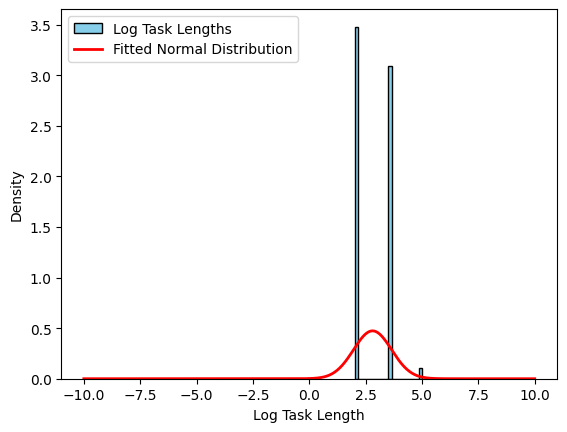

In [32]:
# plot histogram of log task lengths
plt.hist(np.log(resolved_minutes_list), bins=20, density=True, color="skyblue", edgecolor="black", label="Log Task Lengths")
# Fit a normal distribution to the log task lengths
normal_params = np.mean(np.log(resolved_minutes_list)), np.std(np.log(resolved_minutes_list))

# Plot the fitted normal distribution
x = np.linspace(-10, 10, 512)
plt.plot(x, np.exp(-0.5 * ((x - normal_params[0]) / normal_params[1])**2) / (normal_params[1] * np.sqrt(2 * np.pi)), "r-", lw=2, label="Fitted Normal Distribution")

plt.xlabel("Log Task Length")
plt.ylabel("Density")
plt.legend()
plt.show()